In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

from simulations.pixel_array import pixelarrayQPC
from simulations.pixel_array_sim_2 import pixelarrayQPC as pixelarrayQPC2

D:\Anaconda\envs\qcodes\lib\site-packages\kwant\solvers\default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


In [2]:
vals=np.linspace(-2,0,100)

new qpc time: 41.8


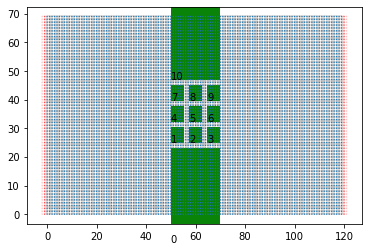

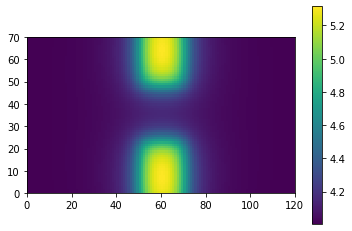

In [3]:
start=time.perf_counter()
QPC=pixelarrayQPC(plot=True)
result1=[]
for val in vals:
    QPC.set_all_pixels(val)
    result1.append(QPC.transmission())
print(f'new qpc time: {(time.perf_counter()-start):.1f}')

oldqpc time: 122.4


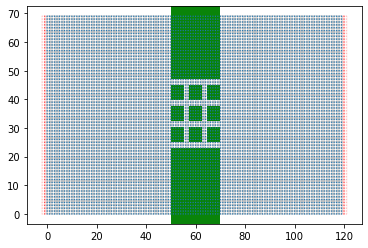

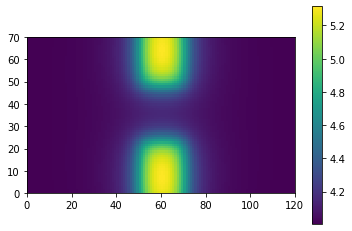

In [4]:
start2=time.perf_counter()
QPC2=pixelarrayQPC2(plot=True)
result2=[]
for val in vals:
    QPC2.set_all_pixels(val)    
    result2.append(QPC2.transmission())
print(f'oldqpc time: {(time.perf_counter()-start2):.1f}')

[2.5992426749339064, 3.229384352999102, 3.952633241009192, 4.417325457711837, 4.991192981271401, 5.368828580336251, 5.974718460941919, 6.179308611619165, 6.894722036944165, 7.0482076916269]
[2.5992426749339064, 3.229384352999102, 3.952633241009192, 4.417325457711837, 4.991192981271401, 5.368828580336251, 5.974718460941919, 6.179308611619165, 6.894722036944165, 7.0482076916269]


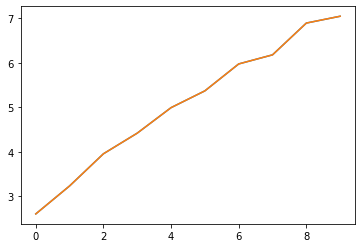

In [ ]:
plt.figure()
plt.plot(result1)
plt.plot(result2)
print(result1)
print(result2)

In [1]:
from multiprocessing import Pool, set_start_method
import multiprocessing
print(multiprocessing.cpu_count())

4


In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

from simulations.pixel_array import pixelarrayQPC
from simulations.pixel_array_sim_2 import pixelarrayQPC as pixelarrayQPC2
vals=np.linspace(-2,0,100)

D:\Anaconda\envs\qcodes\lib\site-packages\kwant\solvers\default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


In [4]:
num_cpus=1
def chunks(lst, n):
    newlist=[]
    for i in range(0, len(lst), int(len(vals)/n)):
        newlist.append(lst[i:i + int(len(vals)/n) ])
    return newlist

pool_variables=chunks(vals,num_cpus)


In [5]:
def func(a):
    return a*2

with Pool(num_cpus) as p:
    final_result=p.map(func,range(5))

In [7]:
# start=time.perf_counter()
# QPCs=[pixelarrayQPC() for i in range(4)]
# # test=zip(pool_variables,QPCs)
# # print(list(test)[0])
# def pool_func(vals):
#     result1=[]
#     QPC_instance=pixelarrayQPC()
#     for val in vals:
#         QPC_instance.set_all_pixels(val)
#         result1.append(QPC_instance.transmission())
#     return result1

# with Pool(num_cpus) as p:
#     final_result=p.map(pool_func,pool_variables)

# print(f'new parallel qpc time: {(time.perf_counter()-start):.1f}')

In [4]:
start=time.perf_counter()
QPCs=[pixelarrayQPC() for i in range(num_cpus)]
# test=zip(pool_variables,QPCs)
# print(list(test)[0])
def pool_func(vals,QPC_instance):
    np.savetxt('test_output.txt',np.zeros(3))
    result1=[]
    for val in vals:
        QPC_instance.set_all_pixels(val)
        result1.append(QPC_instance.transmission())
    return result1

# test=pool_func(pool_variables[0],QPCs[0])
pool=Pool(processes=num_cpus)
final_result=pool.starmap(pool_func,zip(pool_variables,QPCs))
pool.close()
pool.join()

# with Pool(num_cpus) as p:
    # final_result=p.starmap(pool_func,zip(pool_variables,QPCs))

print(f'new parallel qpc time: {(time.perf_counter()-start):.1f}')

In [3]:
# import pickle
# QPC_picle=pixelarrayQPC()
# with open('test_pickle.pkl','wb') as file:
#     pickle.dump(QPC_picle,file)

In [5]:
pool_variables

[array([-2.        , -1.97979798, -1.95959596, -1.93939394, -1.91919192,
        -1.8989899 , -1.87878788, -1.85858586, -1.83838384, -1.81818182,
        -1.7979798 , -1.77777778, -1.75757576, -1.73737374, -1.71717172,
        -1.6969697 , -1.67676768, -1.65656566, -1.63636364, -1.61616162,
        -1.5959596 , -1.57575758, -1.55555556, -1.53535354, -1.51515152,
        -1.49494949, -1.47474747, -1.45454545, -1.43434343, -1.41414141,
        -1.39393939, -1.37373737, -1.35353535, -1.33333333, -1.31313131,
        -1.29292929, -1.27272727, -1.25252525, -1.23232323, -1.21212121,
        -1.19191919, -1.17171717, -1.15151515, -1.13131313, -1.11111111,
        -1.09090909, -1.07070707, -1.05050505, -1.03030303, -1.01010101,
        -0.98989899, -0.96969697, -0.94949495, -0.92929293, -0.90909091,
        -0.88888889, -0.86868687, -0.84848485, -0.82828283, -0.80808081,
        -0.78787879, -0.76767677, -0.74747475, -0.72727273, -0.70707071,
        -0.68686869, -0.66666667, -0.64646465, -0.6

In [1]:
from multiprocessing import Pool

def f(x):
    return x*x

if _name_ == '_main_':
    with Pool(5) as p:
        print(p.map(f, [1, 2, 3]))

NameError: name '_name_' is not defined

In [57]:
from pool_test import main
from simulations.pixel_array import pixelarrayQPC
import numpy as np
import time
vals=np.random.uniform(-2,0,100)
# old,new,par=main(vals)
QPC=pixelarrayQPC()
start=time.perf_counter()
par2=QPC.parallel_transmission(vals,num_cpus=4)
print(f'new parallel qpc time: {(time.perf_counter()-start):.1f}')


D:\Anaconda\envs\qcodes\lib\site-packages\kwant\solvers\default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


new parallel qpc time: 4.5


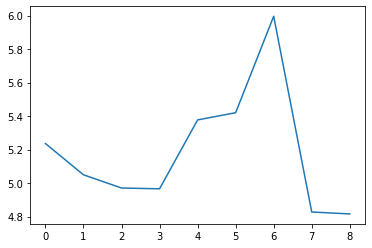

In [58]:
import matplotlib
matplotlib.pyplot.plot(par2)

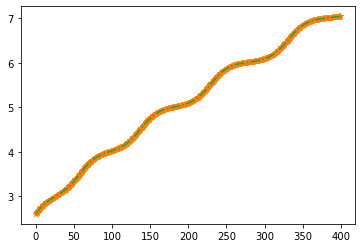

In [13]:
import matplotlib.pyplot as plt
par_results=[]
for par_i in par:
    par_results.extend(par_i)

par2_results=[]
for par_i in par2:
    par2_results.extend(par_i)
plt.figure()
# plt.plot(old)
# plt.plot(new,'*')
plt.plot(par_results,'-.')
plt.plot(par2_results,'-.')

In [11]:
16.4/126.4

0.12974683544303794

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def generate_polynomials(x,params):
    """Generate polynomials of arbitrary x-axis and order

    Args:
        x (np.array): array of arbitrary length
        params (np.array): params array with shape (order,number of polynomials) 

    Returns:
        np.array: polynomials evaluated at x values with shape (len(x),number of polynomials)
    """
    return np.sum([p*(x**i)[:,np.newaxis] for i,p in enumerate(params)],axis=0)

params=np.zeros(shape=(2,3))
params[:,0]=1
params[:,1]=2
params[:,2]=7
# print(params)
x=np.arange(10)
# total=[]
# for i,p in enumerate(params):
#     total.append(p*(x**i)[:,np.newaxis])
# print(total)
test=np.sum([p*(x**i)[:,np.newaxis] for i,p in enumerate(params)],axis=0)
poly3=generate_polynomials(x,params=params)
poly3

array([[ 1.,  2.,  7.],
       [ 2.,  4., 14.],
       [ 3.,  6., 21.],
       [ 4.,  8., 28.],
       [ 5., 10., 35.],
       [ 6., 12., 42.],
       [ 7., 14., 49.],
       [ 8., 16., 56.],
       [ 9., 18., 63.],
       [10., 20., 70.]])

In [30]:
vals=np.linspace(0,10,100)
test=poly3(vals)
# plt.plot(vals,poly3(vals),label='poly3')

# plt.legend()


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 100 is different from 3)

In [56]:
np.arange(10).reshape(2,5).T

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

In [15]:
from simulations.pixel_array import pixelarrayQPC
from optimization.trajectory_optimization import generate_polynomials, fourier_polynomials_to_voltages
import numpy as np

vals=np.linspace(-2,0,100)
order=3
polynomials=8
rng=np.random.default_rng(1)
params=rng.uniform(-0.1,0.1,size=(order,polynomials))
print(params)
print(params.ravel())
print(params.ravel().reshape(order,polynomials))


polynomials=generate_polynomials(vals,params)
print(polynomials.shape)
voltages=fourier_polynomials_to_voltages(vals,polynomials)

[[ 0.00236432  0.09009274 -0.07116808  0.08972989 -0.03763371 -0.01533471
   0.06554052 -0.01816017]
 [ 0.00991874 -0.09448818  0.05070262  0.00762866 -0.03405366  0.05768574
  -0.03936103 -0.00930042]
 [-0.07319166 -0.0193774  -0.05930895 -0.04753733  0.05007293 -0.04391825
  -0.00296181  0.09614744]]
[ 0.00236432  0.09009274 -0.07116808  0.08972989 -0.03763371 -0.01533471
  0.06554052 -0.01816017  0.00991874 -0.09448818  0.05070262  0.00762866
 -0.03405366  0.05768574 -0.03936103 -0.00930042 -0.07319166 -0.0193774
 -0.05930895 -0.04753733  0.05007293 -0.04391825 -0.00296181  0.09614744]
[[ 0.00236432  0.09009274 -0.07116808  0.08972989 -0.03763371 -0.01533471
   0.06554052 -0.01816017]
 [ 0.00991874 -0.09448818  0.05070262  0.00762866 -0.03405366  0.05768574
  -0.03936103 -0.00930042]
 [-0.07319166 -0.0193774  -0.05930895 -0.04753733  0.05007293 -0.04391825
  -0.00296181  0.09614744]]
(100, 8)


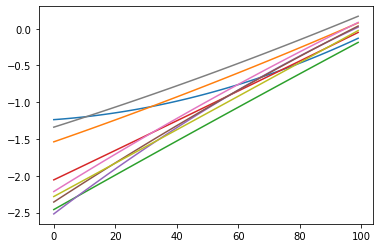

In [13]:
import matplotlib.pyplot as plt
plt.figure()
for i in range(9):
    plt.plot(np.array(voltages)[:,i])